<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicConcepts/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Regularization in Machine Learning

## Introduction
Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty term to the loss function. It helps to reduce model complexity and improve generalization.

Main types of regularization:
1. L1 Regularization (Lasso)
2. L2 Regularization (Ridge)
3. Elastic Net (Combination of L1 and L2)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 1. Creating Synthetic Data

Let's create a dataset with some noise to demonstrate the effects of regularization:

In [ ]:
# Generate synthetic data
np.random.seed(42)
n_samples = 100
n_features = 20

# Create features with decreasing importance
X = np.random.randn(n_samples, n_features)
# True coefficients with decreasing importance
true_coef = np.exp(-0.5 * np.arange(n_features))
# Create target with noise
y = X.dot(true_coef) + np.random.normal(0, 0.1, n_samples)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Linear Regression without Regularization

First, let's see how a standard linear regression model performs:

Linear Regression without regularization:
Mean squared error: 0.0134
R² score: 0.9862


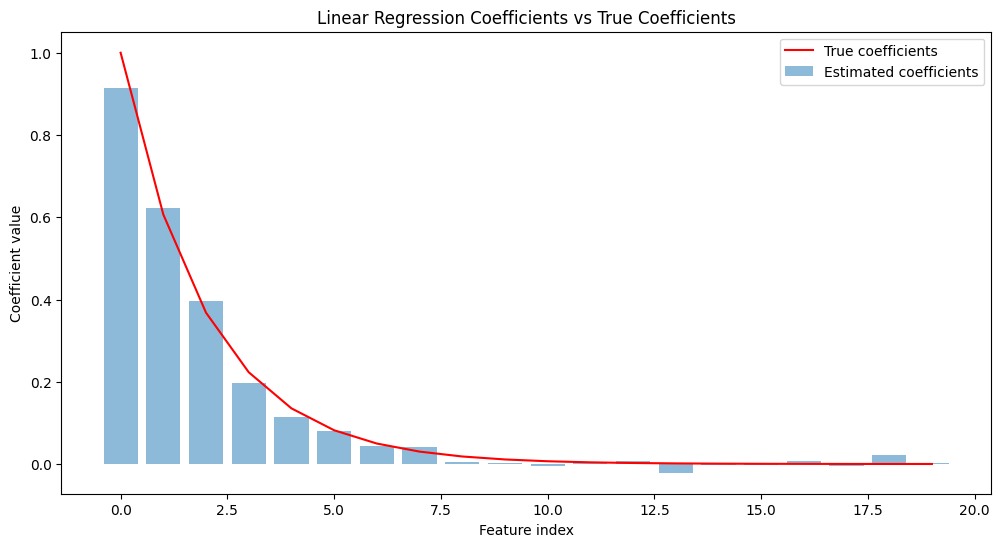

In [ ]:
# Fit linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression without regularization:")
print(f"Mean squared error: {mse_lr:.4f}")
print(f"R² score: {r2_lr:.4f}")

# Plot coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(n_features), lr.coef_, alpha=0.5, label='Estimated coefficients')
plt.plot(range(n_features), true_coef, 'r-', label='True coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Linear Regression Coefficients vs True Coefficients')
plt.legend()
plt.show()

## 3. L2 Regularization (Ridge)

Ridge regression adds a penalty term proportional to the square of coefficient values:

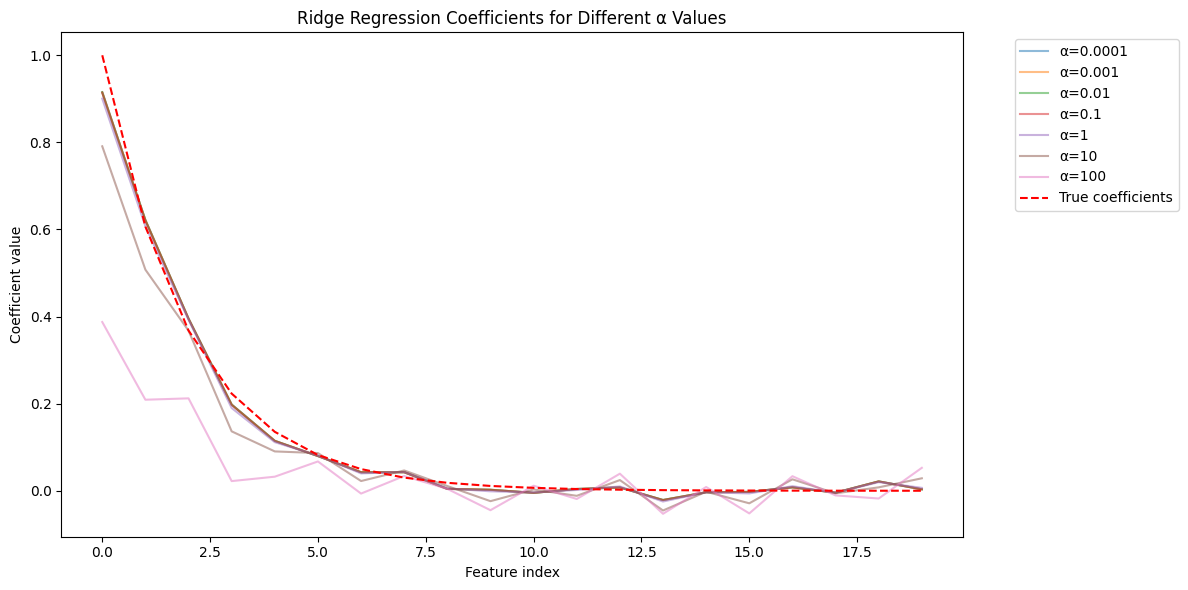

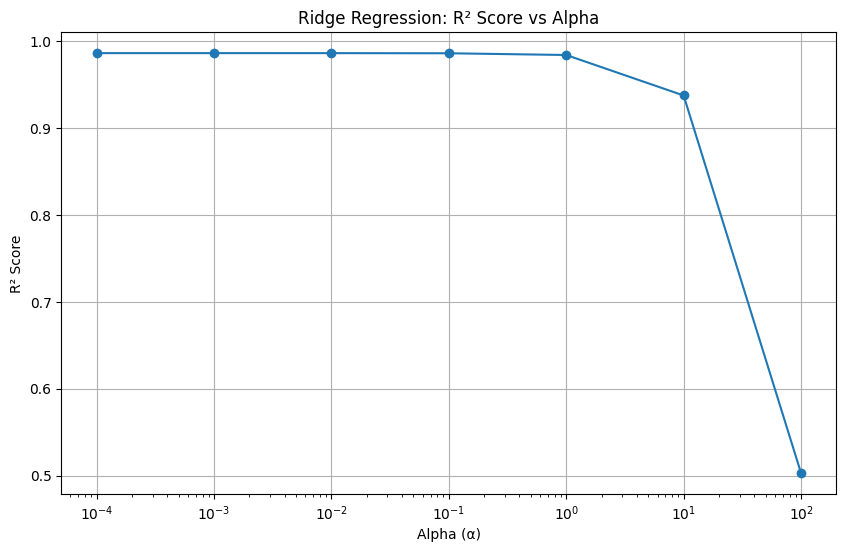

In [ ]:
# Test different alpha values for Ridge regression
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
ridge_models = {}
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_models[alpha] = ridge
    ridge_scores.append(r2_score(y_test, ridge.predict(X_test_scaled)))

# Plot coefficients for different alpha values
plt.figure(figsize=(12, 6))
for alpha in alphas:
    plt.plot(range(n_features), ridge_models[alpha].coef_,
             alpha=0.5, label=f'α={alpha}')
plt.plot(range(n_features), true_coef, 'r--', label='True coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Ridge Regression Coefficients for Different α Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot R² scores
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_scores, '-o')
plt.xlabel('Alpha (α)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: R² Score vs Alpha')
plt.grid(True)
plt.show()

## 4. L1 Regularization (Lasso)

Lasso regression adds a penalty term proportional to the absolute value of coefficients:

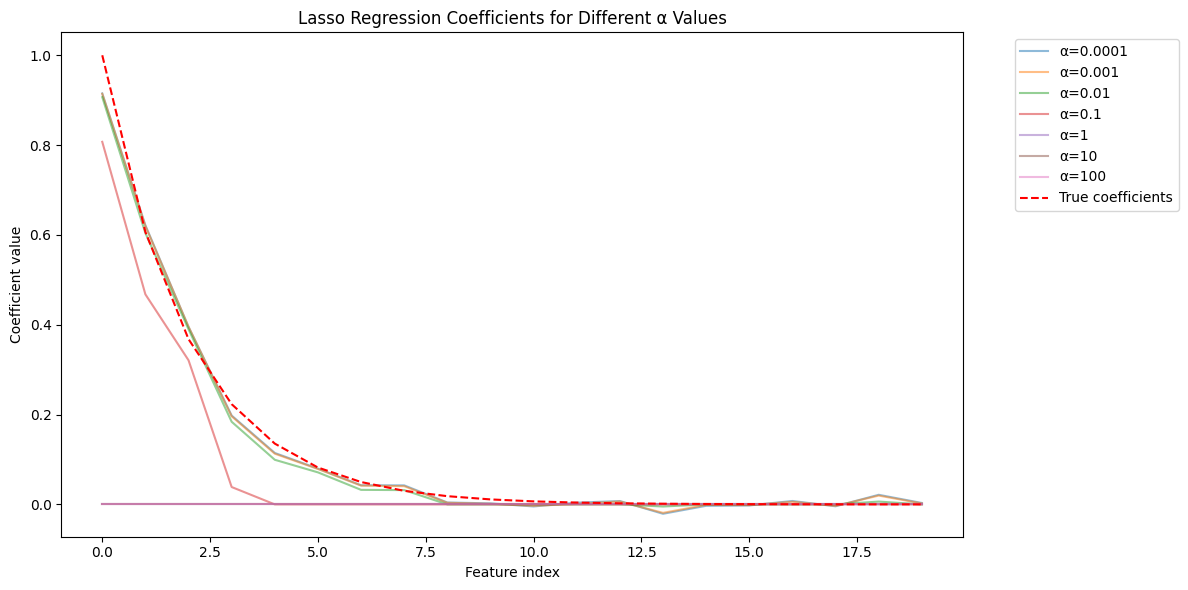

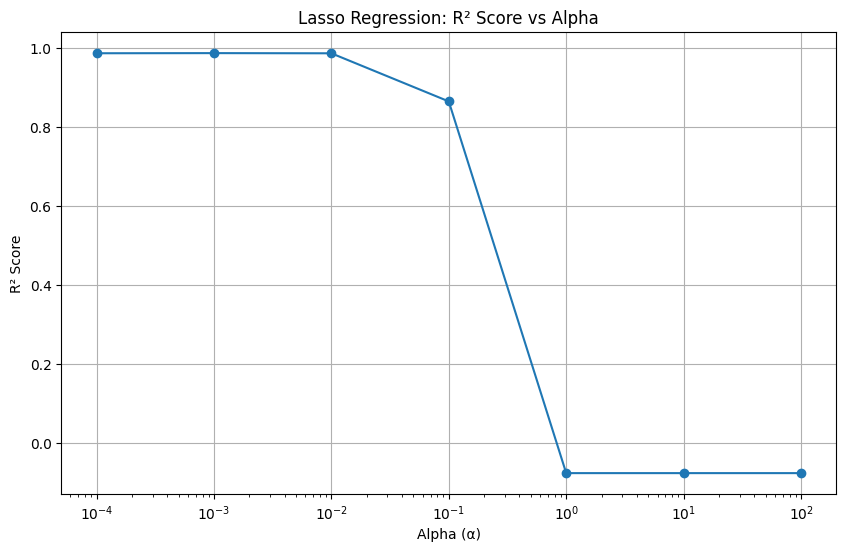

In [ ]:
# Test different alpha values for Lasso regression
lasso_models = {}
lasso_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_models[alpha] = lasso
    lasso_scores.append(r2_score(y_test, lasso.predict(X_test_scaled)))

# Plot coefficients for different alpha values
plt.figure(figsize=(12, 6))
for alpha in alphas:
    plt.plot(range(n_features), lasso_models[alpha].coef_,
             alpha=0.5, label=f'α={alpha}')
plt.plot(range(n_features), true_coef, 'r--', label='True coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Lasso Regression Coefficients for Different α Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot R² scores
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, lasso_scores, '-o')
plt.xlabel('Alpha (α)')
plt.ylabel('R² Score')
plt.title('Lasso Regression: R² Score vs Alpha')
plt.grid(True)
plt.show()

## 5. Elastic Net (Combined L1 and L2)

Elastic Net combines both L1 and L2 regularization:

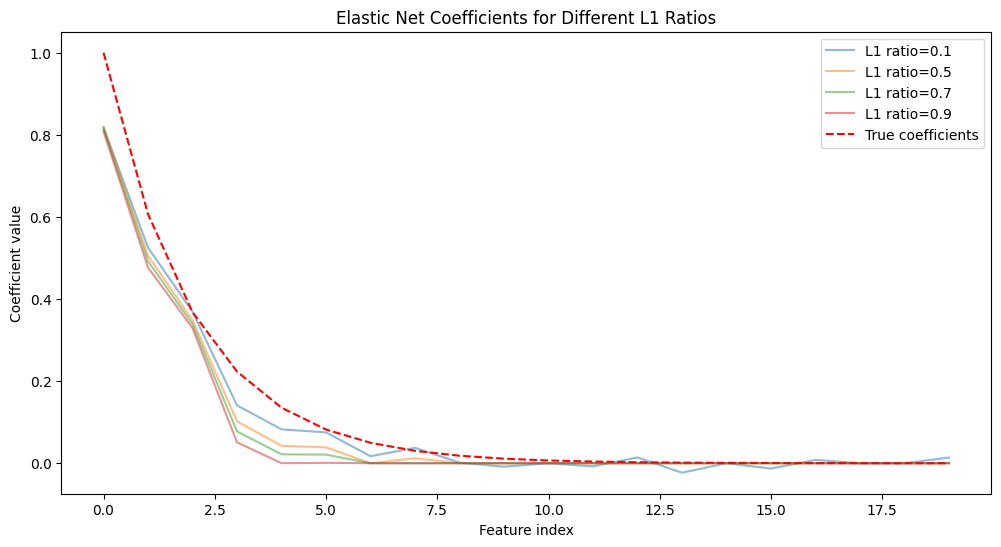

In [ ]:
# Test different combinations of L1 and L2 ratios
l1_ratios = [0.1, 0.5, 0.7, 0.9]
alpha = 0.1  # Fixed alpha

elastic_net_models = {}
elastic_net_scores = []

for l1_ratio in l1_ratios:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_net.fit(X_train_scaled, y_train)
    elastic_net_models[l1_ratio] = elastic_net
    elastic_net_scores.append(r2_score(y_test, elastic_net.predict(X_test_scaled)))

# Plot coefficients for different l1_ratios
plt.figure(figsize=(12, 6))
for l1_ratio in l1_ratios:
    plt.plot(range(n_features), elastic_net_models[l1_ratio].coef_,
             alpha=0.5, label=f'L1 ratio={l1_ratio}')
plt.plot(range(n_features), true_coef, 'r--', label='True coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Elastic Net Coefficients for Different L1 Ratios')
plt.legend()
plt.show()

## 6. Comparing All Methods

Let's compare the performance of all regularization methods:

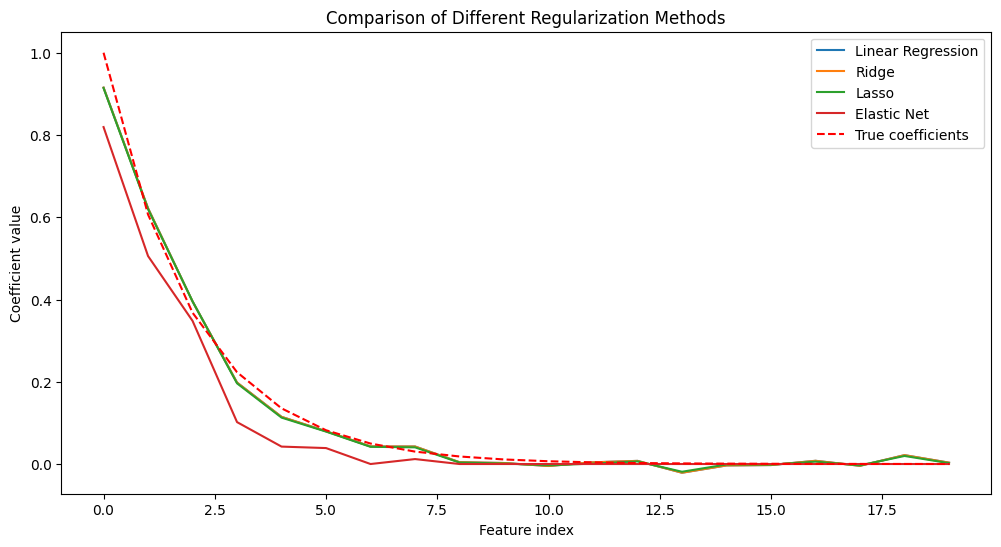


Model Comparison:
               Model       MSE        R²  Non-zero coefficients
0  Linear Regression  0.013420  0.986220                     20
1              Ridge  0.013420  0.986220                     20
2              Lasso  0.013045  0.986605                     20
3        Elastic Net  0.065767  0.932468                      7


In [ ]:
# Choose best models based on previous results
best_alpha = alphas[np.argmax(ridge_scores)]
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

best_alpha = alphas[np.argmax(lasso_scores)]
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

# Compare coefficients
plt.figure(figsize=(12, 6))
plt.plot(range(n_features), lr.coef_, label='Linear Regression')
plt.plot(range(n_features), ridge_best.coef_, label='Ridge')
plt.plot(range(n_features), lasso_best.coef_, label='Lasso')
plt.plot(range(n_features), elastic_net.coef_, label='Elastic Net')
plt.plot(range(n_features), true_coef, 'r--', label='True coefficients')
plt.xlabel('Feature index')
plt.ylabel('Coefficient value')
plt.title('Comparison of Different Regularization Methods')
plt.legend()
plt.show()

# Compare metrics
models = {
    'Linear Regression': lr,
    'Ridge': ridge_best,
    'Lasso': lasso_best,
    'Elastic Net': elastic_net
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': name,
        'MSE': mse,
        'R²': r2,
        'Non-zero coefficients': np.sum(model.coef_ != 0)
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

## 7. Key Takeaways

### Regularization Effects:

1. **L1 Regularization (Lasso)**:
   - Promotes sparsity (feature selection)
   - Some coefficients become exactly zero
   - Good for feature selection

2. **L2 Regularization (Ridge)**:
   - Shrinks coefficients towards zero
   - No coefficients become exactly zero
   - Good for handling multicollinearity

3. **Elastic Net**:
   - Combines benefits of both L1 and L2
   - Good for cases with many correlated features

### When to Use Each Method:

- **Ridge**: When you have multicollinearity in your features
- **Lasso**: When you want to perform feature selection
- **Elastic Net**: When you want both feature selection and handling multicollinearity

### Best Practices:

1. Always scale your features before applying regularization
2. Use cross-validation to select the best regularization parameters
3. Consider the problem context when choosing the regularization method